In [1]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

In [2]:
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
#X_train = np.r_[X_train + 3, X_train]

# Generating new, 'normal' observation
#X_test = 0.2 * rng.randn(200, 2)
#X_test = np.r_[X_test + 3, X_test]

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))

X_all = np.concatenate((X_train, X_outliers))
print (X_train.shape, X_outliers.shape, X_all.shape)
#X_all = np.concatenate((X_train, X_test, X_outliers))
#print (X_train.shape, X_test.shape, X_outliers.shape, X_all.shape)

X_all = pd.DataFrame(X_all, columns = ['x1', 'x2'])


(1000, 2) (50, 2) (1050, 2)


(-2, 5)

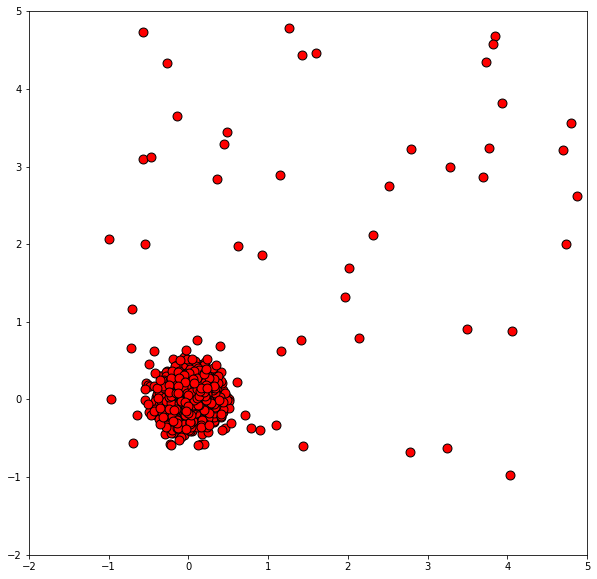

In [3]:
# Plotting generated data ----

fig, ax = plt.subplots(figsize=(10, 10))

p1 = plt.scatter(X_all.x1, X_all.x2, c='red',
                 s=20*4, edgecolor='k')
plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))

#plt.show()

In [4]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
clf.fit(X_all)

# predictions
y_pred = clf.predict(X_all)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:221: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [5]:
# outliers
print (y_pred, list(y_pred).count(1), list(y_pred).count(-1))

[ 1  1  1 ... -1 -1 -1] 945 105


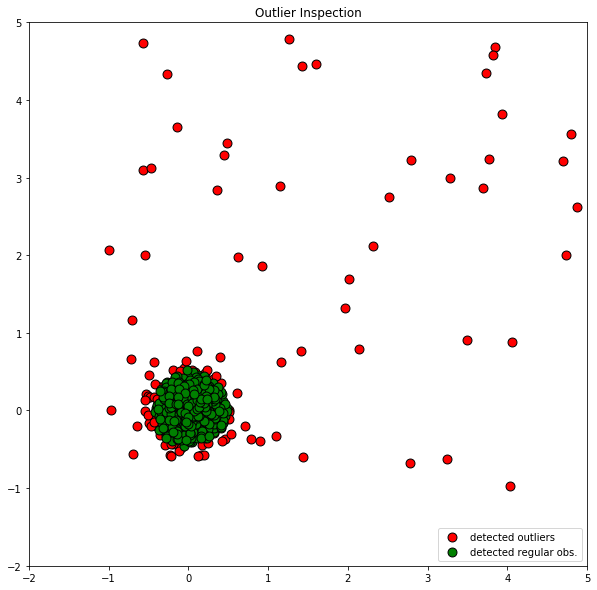

In [6]:
# Inspecting the outliers ----
fig, ax = plt.subplots(figsize=(10, 10))

# adding the predicted label
X_all = X_all.assign(y = y_pred)

plt.title("Outlier Inspection")

p2 = plt.scatter(X_all.loc[X_all.y == -1, ['x1']], 
                 X_all.loc[X_all.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_all.loc[X_all.y ==  1, ['x1']], 
                 X_all.loc[X_all.y ==  1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p2, p3],
           ["detected outliers", 
            "detected regular obs."],
           loc="lower right")

#plt.show()